In [109]:
#import libraries
import re
import numpy as np
import pandas as pd
# plotting
import seaborn as sns
from wordcloud import WordCloud
import matplotlib.pyplot as plt
# nltk
from nltk.stem import WordNetLemmatizer
# sklearn
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import BernoulliNB
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import confusion_matrix, classification_report

In [110]:
# Importing the dataset
DATASET_COLUMNS=['target','ids','date','flag','user','text']
DATASET_ENCODING = "ISO-8859-1"
df = pd.read_csv('tweets2.csv', encoding=DATASET_ENCODING, names=DATASET_COLUMNS)
df.sample(5)

,target,ids,date,flag,user,text
3331,4,1958135905,Fri May 29 02:47:01 PDT 2009,NO_QUERY,kalsreyes,1 2 3 4 - Plain White T's Just love this song
1620,4,1468834363,Tue Apr 07 03:58:49 PDT 2009,NO_QUERY,orcish_dreams,I had to wake up and start my wifie's car.. ge...
3097,4,1469109923,Tue Apr 07 05:14:29 PDT 2009,NO_QUERY,nightfalldotnet,"Fresh strawberries, blackberries, and a chicke..."
666,0,1467981468,Mon Apr 06 23:06:19 PDT 2009,NO_QUERY,Roses_Are_Red,@ryanmwilson aww that stinks! *hugs*
3347,4,1960142584,Fri May 29 07:29:30 PDT 2009,NO_QUERY,UrbanWiseWifey,@romannsjr I'm blushing. OK RUNNING not walkin...


In [111]:
df.head()

,target,ids,date,flag,user,text
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


In [112]:
df.columns

Index(['target', 'ids', 'date', 'flag', 'user', 'text'], dtype='object')

In [113]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3568 entries, 0 to 3567
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   target  3568 non-null   int64 
 1   ids     3568 non-null   int64 
 2   date    3568 non-null   object
 3   flag    3568 non-null   object
 4   user    3568 non-null   object
 5   text    3568 non-null   object
dtypes: int64(2), object(4)
memory usage: 167.4+ KB


In [114]:
df.describe()

,target,ids
count,3568.000000,3.568000e+03
mean,2.468610,1.506413e+09
std,1.944599,1.310285e+08
min,0.000000,1.467810e+09
25%,0.000000,1.468033e+09
50%,4.000000,1.468854e+09
75%,4.000000,1.469027e+09
max,4.000000,1.960187e+09


In [115]:
df.target.nunique()

2

In [116]:
df.shape

(3568, 6)

In [117]:
df['flag'].value_counts()
#lol, not needed uhn

NO_QUERY    3568
Name: flag, dtype: int64

In [118]:
df['target'].value_counts()

4    2202
0    1366
Name: target, dtype: int64

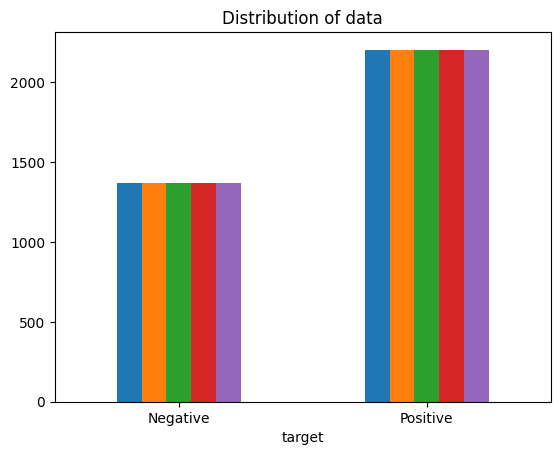

In [119]:
# Plotting the distribution for dataset.
ax = df.groupby('target').count().plot(kind='bar', title='Distribution of data',legend=False)
ax.set_xticklabels(['Negative','Positive'], rotation=0)
# Storing data in lists.
text, sentiment = list(df['text']), list(df['target'])

<AxesSubplot:xlabel='target', ylabel='count'>

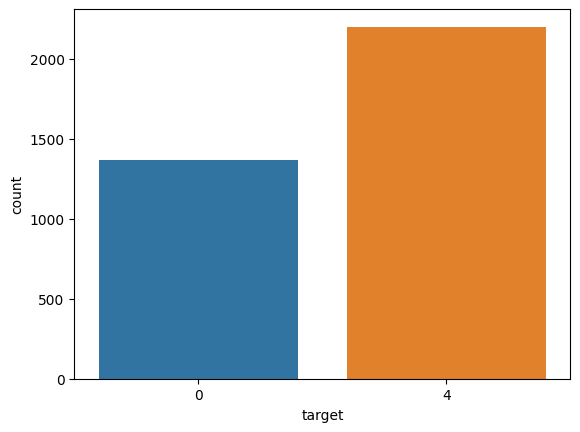

In [120]:
import seaborn as sns
sns.countplot(x='target', data=df)

In [121]:
df.head()

,target,ids,date,flag,user,text
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


In [122]:
data = df[['target','text']]

In [123]:
data.sample(5)

,target,text
1034,0,@octopuseatspie I GOT THE I CAN HAS CHEZBURGER...
212,0,@GuruMN but this is canada canada is weird. w...
1536,4,"@kimmmyberley Lol, he makes a few good points ..."
582,0,@nachojohnny Brian don't make me fuck u up LOL...
2595,4,Rock vs Hogan @ Wrestlemania X8...most touchin...


In [124]:
data['target'] = data['target'].replace(4,1)

/tmp/ipykernel_59869/2499609609.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['target'] = data['target'].replace(4,1)


In [125]:
data['target'].unique()

array([0, 1])

In [126]:
data_pos = data[data['target'] == 1]
data_neg = data[data['target'] == 0]   

In [127]:
data_pos = data_pos.iloc[:int(500)]
data_neg = data_neg.iloc[:int(500)]

In [128]:
dataset = pd.concat([data_pos,data_neg])

In [129]:
dataset.sample(5)

,target,text
1729,1,@dhatfield love the new comic girl look I alw...
197,0,Is not going to sleep tonite.
1541,1,@MizFitOnline normal workday for me. I do stil...
422,0,yea it is so quiet around here cuz everyone ha...
1443,1,@itinerant_vae It's okay. I work this afterno...


In [130]:
dataset['text']=dataset['text'].str.lower()
dataset[['target','text']].sample(10)

,target,text
1823,1,@chappy87 hahaha. i was aiming for the vomit-f...
451,0,car show season has started without me
397,0,twiggassssssss i been out of range all day i'...
479,0,still 3 more days until my internet gets uncap...
457,0,is tireddddddd. want to sleep but i have an as...
1399,1,"i mean its a holiday, who wants to go to netba..."
67,0,"mo jobs, no money. how in the hell is min wag..."
1691,1,"another ducky day: mass, some paperwork, a lit..."
50,0,broadband plan 'a massive broken promise' http...
269,0,aaaaand the nausea is back.


In [131]:
stopwordlist = ['a', 'about', 'above', 'after', 'again', 'ain', 'all', 'am', 'an',
             'and','any','are', 'as', 'at', 'be', 'because', 'been', 'before',
             'being', 'below', 'between','both', 'by', 'can', 'd', 'did', 'do',
             'does', 'doing', 'down', 'during', 'each','few', 'for', 'from',
             'further', 'had', 'has', 'have', 'having', 'he', 'her', 'here',
             'hers', 'herself', 'him', 'himself', 'his', 'how', 'i', 'if', 'in',
             'into','is', 'it', 'its', 'itself', 'just', 'll', 'm', 'ma',
             'me', 'more', 'most','my', 'myself', 'now', 'o', 'of', 'on', 'once',
             'only', 'or', 'other', 'our', 'ours','ourselves', 'out', 'own', 're','s', 'same', 'she', "shes", 'should', "shouldve",'so', 'some', 'such',
             't', 'than', 'that', "thatll", 'the', 'their', 'theirs', 'them',
             'themselves', 'then', 'there', 'these', 'they', 'this', 'those',
             'through', 'to', 'too','under', 'until', 'up', 've', 'very', 'was',
             'we', 'were', 'what', 'when', 'where','which','while', 'who', 'whom',
             'why', 'will', 'with', 'won', 'y', 'you', "youd","youll", "youre",
             "youve", 'your', 'yours', 'yourself', 'yourselves']

In [132]:
STOPWORDS = set(stopwordlist)
def cleaning_stopwords(text):
    return " ".join([word for word in str(text).split() if word not in STOPWORDS])
dataset['text'] = dataset['text'].apply(lambda text: cleaning_stopwords(text))
dataset['text'].head()

1366                                             good day
1367    @shimbin rose without thorns isn't proper rose...
1368                                   great day sox game
1369    @ricraftis can't imagine 9 minutes day twitter...
1370    wonderful people tesco mobile sorted phone. in...
Name: text, dtype: object

In [133]:
import string
english_punctuations = string.punctuation
punctuations_list = english_punctuations
def cleaning_punctuations(text):
    translator = str.maketrans('', '', punctuations_list)
    return text.translate(translator)
dataset['text']= dataset['text'].apply(lambda x: cleaning_punctuations(x))
dataset['text'].head()

1366                                             good day
1367      shimbin rose without thorns isnt proper rose it
1368                                   great day sox game
1369    ricraftis cant imagine 9 minutes day twitter  ...
1370    wonderful people tesco mobile sorted phone inf...
Name: text, dtype: object

In [134]:
def cleaning_repeating_char(text):
    return re.sub(r'(.)1+', r'1', text)
dataset['text'] = dataset['text'].apply(lambda x: cleaning_repeating_char(x))

In [135]:
def cleaning_URLs(data):
    return re.sub('((www.[^s]+)|(https?://[^s]+))',' ',data)
dataset['text'] = dataset['text'].apply(lambda x: cleaning_URLs(x))

In [136]:
def cleaning_numbers(data):
    return re.sub('[0-9]+', '', data)
dataset['text'] = dataset['text'].apply(lambda x: cleaning_numbers(x))
dataset['text'].head()

1366                                             good day
1367      shimbin rose without thorns isnt proper rose it
1368                                   great day sox game
1369    ricraftis cant imagine  minutes day twitter  g...
1370    wonderful people tesco mobile sorted phone inf...
Name: text, dtype: object

In [137]:
dataset_cpy = dataset

In [138]:
dataset_cpy['text']

1366                                             good day
1367      shimbin rose without thorns isnt proper rose it
1368                                   great day sox game
1369    ricraftis cant imagine  minutes day twitter  g...
1370    wonderful people tesco mobile sorted phone inf...
                              ...                        
495                                 brodhe geez ur no fun
496                                  wanna punk rock band
497            jyesmith thats lot angst tuesday afternoon
498     im glad britney isnt crazy anymore one hell sh...
499                    huuuge headache omg feel like crap
Name: text, Length: 1000, dtype: object

In [139]:
from nltk.tokenize import RegexpTokenizer
tokenizer = RegexpTokenizer('\s+', gaps = True)
dataset['text'] = dataset['text'].apply(tokenizer.tokenize)
dataset['text'].head()

1366                                          [good, day]
1367    [shimbin, rose, without, thorns, isnt, proper,...
1368                              [great, day, sox, game]
1369    [ricraftis, cant, imagine, minutes, day, twitt...
1370    [wonderful, people, tesco, mobile, sorted, pho...
Name: text, dtype: object

In [144]:
import nltk
st = nltk.PorterStemmer()
def stemming_on_text(data):
    text = [st.stem(word) for word in data]
    return data
dataset['text']= dataset_cpy['text'].apply(lambda x: stemming_on_text(x))
dataset['text'].head()

1366                                          [good, day]
1367    [shimbin, rose, without, thorns, isnt, proper,...
1368                              [great, day, sox, game]
1369    [ricraftis, cant, imagine, minutes, day, twitt...
1370    [wonderful, people, tesco, mobile, sorted, pho...
Name: text, dtype: object

In [145]:
X=data.text
y=data.target

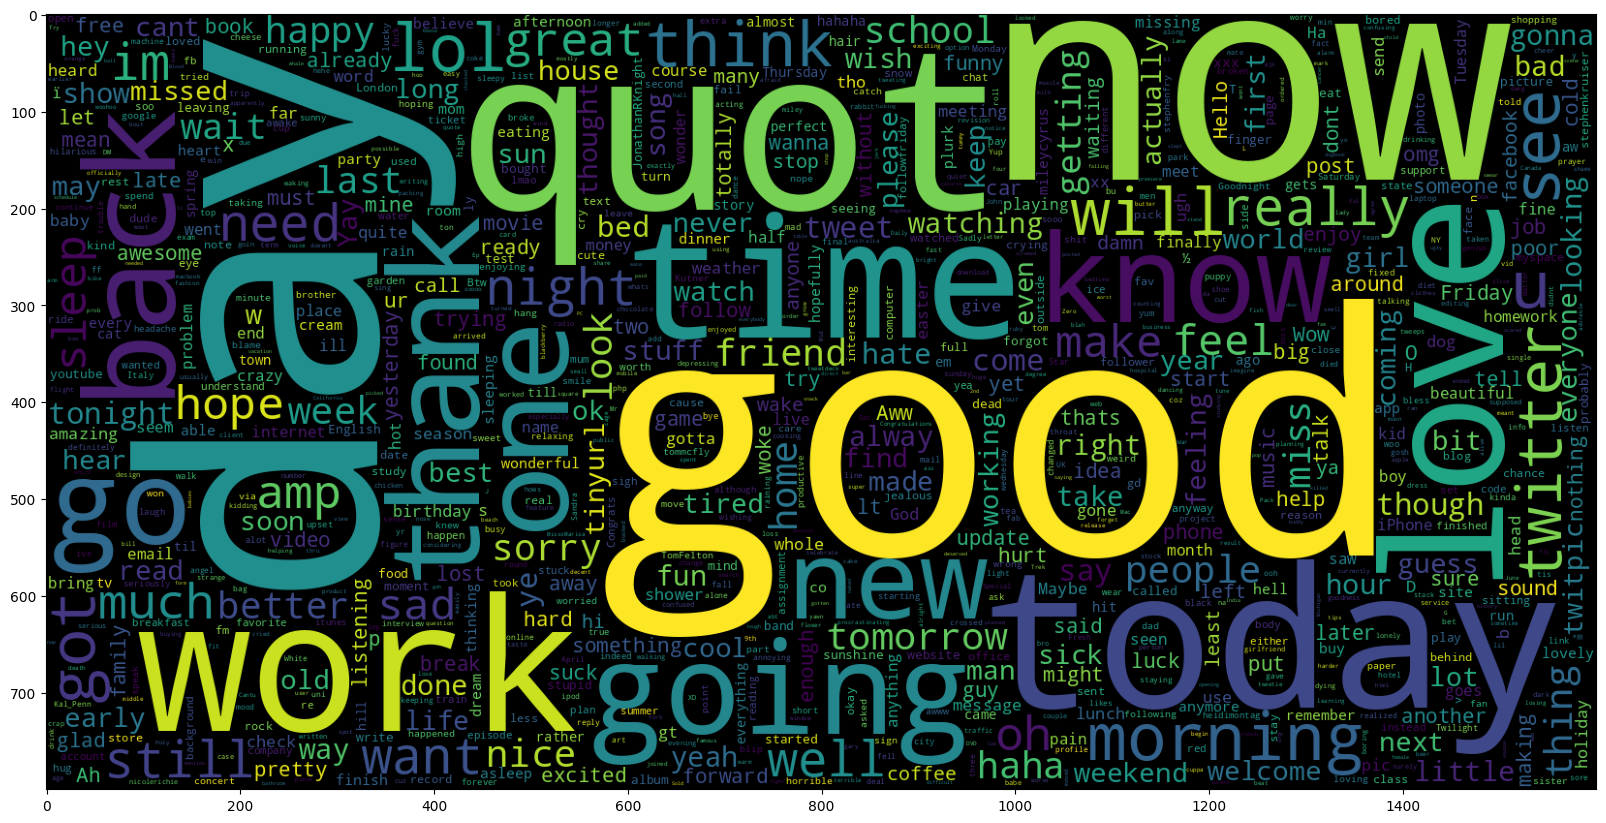

In [146]:
data_neg = data['text'][:800000]
plt.figure(figsize = (20,20))
wc = WordCloud(max_words = 1000 , width = 1600 , height = 800,
               collocations=False).generate(" ".join(data_neg))
plt.imshow(wc)

In [147]:
data_pos = data['text'][800000:]
wc = WordCloud(max_words = 1000 , width = 1600 , height = 800,
              collocations=False).generate(" ".join(data_pos))
plt.figure(figsize = (20,20))
plt.imshow(wc)

ValueError: We need at least 1 word to plot a word cloud, got 0.